# Lab Two Exploring Image Data
## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou
## Data introduction 
Data source: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset

Data file name:  Lab2/flowers/102 flower

1 folder and 1 JSON file, the folder named flowers contains the images categorized as test, train, valid data (We will be using the train data in this lab). The file named cat_to_name.json will hold all respective values to each to represent as labels to each image.


## Environment
python 3.11.5, conda 23.9.0 ,numpy-1.24.3 pandas-2.2.0 pytz-2023.4 tzdata-2023.4, pip-23.3.2 matplotlib: 3.8.2


# 1.Business Understanding
## Purpose of the Dataset:
The Oxford-102 Flower dataset was primarily gathered to serve as a standard for computer vision and machine learning academics and practitioners, especially in the area of fine-grained picture categorization. Differentiating between closely related categories, such distinct types of flowers, is known as fine-grained categorization. This can be a difficult task because of minute visual differences.

## Prediction Task:
Creating a model that can correctly place photos of flowers into one of the 102 established categories is the prediction task for this dataset. The outcomes of this prediction exercise will be of interest to other parties, such as ecologists, florists, agricultural scientists, botanists, and amateur flower identification enthusiasts.

## Importance of the Data:
There are various reasons why this dataset matters. First of all, it functions as a standard by which different computer vision algorithms are compared for how well they perform in fine-grained categorization tasks. Furthermore, precise categorization models for flowers can find useful uses in horticulture, agriculture, and biodiversity monitoring. Thirdly, knowledge about the traits and range of various flower species can help with ecological studies and preservation initiatives.

## Performance Expectations:
The prediction system would need to classify flowers with a high degree of accuracy in order for the identified third parties to find it valuable. Misclassification would need to function with great precision and recall, preferably achieving accuracy rates well above 90%, since it could have real-world repercussions, such as misidentifying a harmless flower species as a hazardous weed. The model should also be resilient to changes in lighting, background, and flower orientation in the photos, and it should be able to generalize effectively to new data.


In [1]:
import numpy as np
import re

print('Numpy:',np.__version__)
print('Regex:', re.__version__)

Numpy: 1.24.3
Regex: 2.2.1


# 2. Data Preparation

While preparing the data given the format in which it's in having sub folders correlated to the specific labels defining the group of images finding the path using the glob library helps to gather this information. 

glob documentation
https://docs.python.org/3/library/glob.html

Additionally regex is used when wanting to evaluate specific labels gathered from the path name of the image path.

regex documentation
https://docs.python.org/3/howto/regex.html


In [2]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import glob


i = glob.glob("./*/102 flower/flowers/train/*/*.jpg")
pattern = r"[0-9]+/" # in mac version using / 
pattern_win=r"[0-9]+\\" # in window shoud using \\
data = []
images = []
targets = []


for j in i:
    # Resize and recolor images as necessary.
    im = resize(rgb2gray(imread(f'{j}')),(100,100))
    images.append(im)
    # Linearize the images to create a table of 1-D
    # image features (each row should be one image). 
    matches = re.search(pattern,j)  # change here when you are in mac
    targets.append(int(matches.group(0)[:-1]))
    data.append(im.flatten()) 
    
    
# Read in your images as numpy arrays.
targets = np.array(targets)
data = np.array(data)
images = np.array(images)

Above you can find the data being prepared, where the files of the images located are being read in. When finding the targets parallel of each individual image, given the path, the path name holds the label of the image where regular expression is used and stored into the target variable.

### Resize Images:
  * Can be seen on line 22 where the images are read into a variable and later passed into a numpy array on line 34 
### Linearize Images:
  * Given the image stored in a variable im on line 28 is where the images are linearized and created into a 1-D image feature.


In [3]:
import json

f = glob.glob("./*/102 flower/cat_to_name.json")
with open(f[0],'r') as file:
    val = json.load(file)

Above you can find the json file that holds all the key value pairs of all the different flowers within the data set stored into a variable as a dictionary.

In [4]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb
X = data 
y = np.array(targets)
names = list(val.keys())
n_classes = len(names)
n_samples, n_features = data.shape
_,h,w = images.shape
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print ("The size of each image to be displayed:", h*w) 

n_samples: 6552
n_features: 10000
n_classes: 102
The size of each image to be displayed: 10000


In [5]:
import pandas as pd

df = pd.DataFrame(y)
index = df.drop_duplicates()

Given the amount of data containing different images but similar title labels, to provide a variance in the data dropping the duplicates can help as shown above and later implemented below.

### Visualize several images
  * Below can display 12 of the various 102 different images of flowers within our data set.
  * Also recoloring to grayscale was done when displaying each image

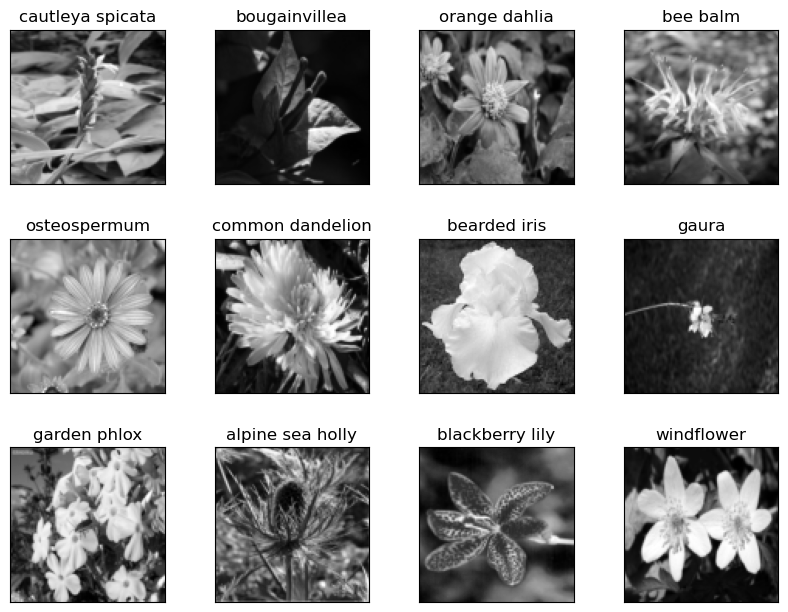

In [6]:
# a helper plotting function refrenced from the lecture content 04. Dimension
# Reduction and Images from Class CS 7324 made by eclarson and can be found on github
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

import matplotlib.pyplot as plt
import math as mt


def plot_gallery(data, titles, h, w, n_row=30, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    counter = 0
    for i in titles:
        if counter > 11:
            break
        plt.subplot(n_row, n_col, counter + 1)
        counter+=1
        plt.imshow(data[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(val[str(df.iloc[i,0])] , size=12)
        plt.xticks(())
        plt.yticks(())
        

plot_gallery(X, index.index, h, w)


# Data Reduction

Below will perform linear dimensionality reduction of the images using both Principal Component Analysis (PCA) as well as Randomized Principal Component Analysis (RPCA). This is done in order to show a vast difference between the usage and how effective each technique can be useful on specific requirements of the application.

Now instead of extracting our data performance on the entire data set with 6552 images, we will instead only evaluate based on 1000 with eigen vectors, to help reconstruct with the eigen features.

In [7]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

from sklearn.decomposition import PCA

n_components = 697
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces_pca = pca.components_.reshape((n_components, h, w))

Extracting the top 697 eigenfaces from 6552 faces
CPU times: user 1min 9s, sys: 1.33 s, total: 1min 11s
Wall time: 10.6 s


In [8]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

n_components = 697
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenfaces_rpca = rpca.components_.reshape((n_components, h, w))

Extracting the top 697 eigenfaces from 6552 faces
CPU times: user 1min 11s, sys: 1.26 s, total: 1min 13s
Wall time: 10.7 s


Below we will use the following inclass method to find a projection to capture the largest amount of variation in the data using PCA & RPCA, where each principle component explains amount of variation in the data and from this explained variation is encoded in the eigenvalues of each eigenvector with the following equation.


$$ r_q=\frac{\sum_{j=1}^q \lambda_j}{\sum_{\forall i} \lambda_i} $$

In [9]:
# This method is captured from Lecture where the reference is as below
# manipulated from Sebastian Raschka Example
# also from his blog here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

def plot_explained_variance(pca,rpca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(title = "Principal Component Analysis",title_x=0.22,xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
    r_explained_var = rpca.explained_variance_ratio_
    r_cum_var_exp = np.cumsum(r_explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=r_explained_var, name='individual explained variance'),
                 Scatter(y=r_cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(title = "Randomized Principal Component Analysis",title_x=0.15,xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca,rpca)

Based on the images and samples, they are similar and the time cost are similar. We could find out other way to chosse which one is better by a quantitive method--mean squared erro.

In [10]:
from sklearn.metrics import mean_squared_error
x1data=X
x2data=X
mse_fullPCA=[]
mse_rPCA=[]

# this function will spend about 12 mins
for n in range(1,40):
    recon=pca.inverse_transform(pca.fit_transform(x1data.copy()))
    mse=mean_squared_error(x1data[0],recon[0],squared=False)
    recon2=rpca.inverse_transform(rpca.fit_transform(x2data.copy()))
    mse2=mean_squared_error(x2data[0],recon2[0],squared=False)
    mse_fullPCA.append({"Full PCA MSE":mse})
    mse_rPCA.append({"Randomized PCA MSE":mse2,"Components":n})
    # print(f"finish: {n}", end='', flush=True)
fpca_df=pd.DataFrame(data=mse_fullPCA)
rpca_df=pd.DataFrame(data=mse_rPCA)

df=pd.concat([fpca_df,rpca_df],axis=1) # concatenat to one to show 
df

Full PCA MSE  Randomized PCA MSE  Components
0       0.057883            0.058724           1
1       0.059226            0.058768           2
2       0.058248            0.058341           3
3       0.058332            0.058362           4
4       0.057653            0.058123           5
5       0.057861            0.058283           6
6       0.057899            0.058086           7
7       0.057545            0.058586           8
8       0.057651            0.057205           9
9       0.058159            0.058218          10
10      0.058470            0.057761          11
11      0.058835            0.058212          12
12      0.057912            0.057125          13
13      0.056694            0.058102          14
14      0.058118            0.058348          15
15      0.057896            0.059729          16
16      0.057802            0.058009          17
17      0.058260            0.058079          18
18      0.058139            0.058962          19
19      0.058154            0.058586          20
20      0.059058            0.058087          21
21      0.058200            0.057511          22
22      0.057743            0.057641          23
23      0.058016            0.057682          24
24      0.057606            0.058218          25
25      0.058475            0.058187          26
26      0.058102            0.058694          27
27      0.058517            0.057840          28
28      0.058892            0.057626          29
29      0.057840            0.056930          30
30      0.059279            0.058391          31
31      0.058362            0.059308          32
32      0.058717            0.058383          33
33      0.057730            0.058513          34
34      0.058151            0.058174          35
35      0.057767            0.057808          36
36      0.058413            0.058815          37
37      0.058463            0.058457          38
38      0.059102            0.058121          39

In [11]:
df.plot(x="Components", y=["Randomized PCA MSE","Full PCA MSE"])
plt.xlabel('Components')
plt.ylabel('Mean Squared Error (%)', fontsize=12)
plt.title('PCA Performance Comparison')
plt.show()


Based this table and plot, we can see how the MSE of the each are similar, even we increase the count of components. This means that both had similar percentage of the mse when we use it for reconstructing.

## Principal Component Analysis (PCA):

#### Analysis:

After carefully performing linear dimensionality reduction of the images into eigen vectors, the explained variance of each component shows that 60 % can be explained within 15 principal components while 315 components can explain 90% of the variance. While true for best representation we'll find that having 95% of variance explained with 697 components. Given this, PCA was done with 697 components, CPU time and overall actual elapsed time (Wall time).

Extracting the top 697 eigenfaces from 6552 faces

CPU times: user 1min 12s, sys: 1.41 s, total: 1min 14s

Wall time: 11.2 s


#### Conclusion: 
Given our ideal prediction algorithm the model we would need to perform with high precision and recall, ideally achieving accuracy rates well above 90%. Meaning we would need at least 315 components to achieve this requirement. However in the project, projecting 95% accuracy will give the best result without taking too much time for performance as used in this Lab.

## Randomized Principal Component Analysis (RPCA):

#### Analysis:

Similarly you can see Randomized Principle Component Analysis shows similar results for the explained variance ratio in correspondance to Principal Component Analysis as the explained variance of each component shows that 60 % can be explained within 15 principal components while 315 components can explain 90% of the variance. While true for best representation we'll find that having 95% of variance explained with 697 components. Given this, PCA was done with 697 components, CPU time and overall actual elapsed time (Wall time).

Extracting the top 697 eigenfaces from 6552 faces

CPU times: user 1min 13s, sys: 1.16 s, total: 1min 14s

Wall time: 10.7 s


#### Conclusion: 

Given our ideal prediction algorithm the model we again would need to perform with high precision and recall, ideally achieving accuracy rates well above 90%. Meaning we would need at least 315 components to achieve this requirement. However in the project, projecting 95% accuracy will give the best result without taking too much time for performance as used in this Lab.




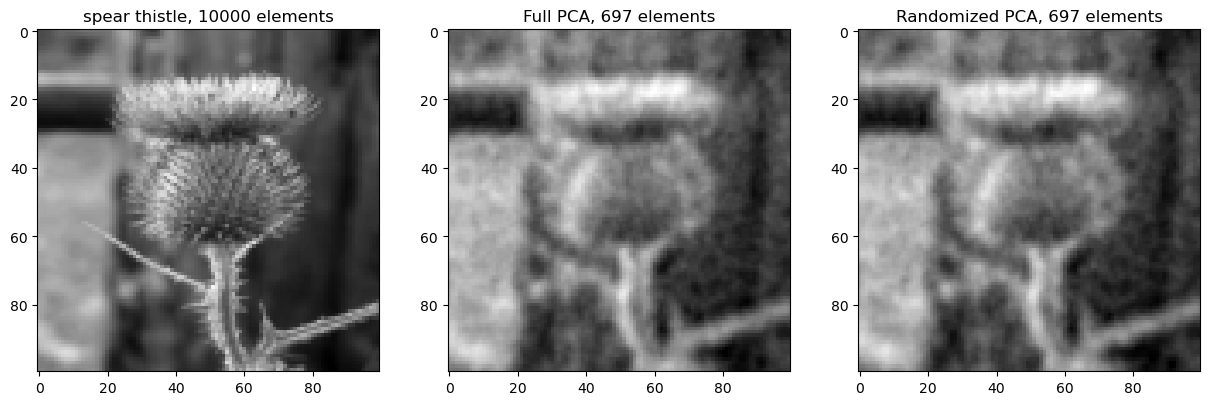

In [12]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer



def plt_reconstruct(idx_to_reconstruct,X,pca,rpca,n_neighbors=3):
     
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    
    # Fit KNNImputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputer.fit(X)
    
    # Impute missing values using nearest neighbors
    reconstructed_image = imputer.fit_transform(x_flat)
    
    # PCA and RPCA transformation
    reconstructed_image_pca = pca.inverse_transform(pca.transform(reconstructed_image))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(reconstructed_image))
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(val[str(y[idx_to_reconstruct])]+f", {x_flat.shape[1]} elements")
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image_pca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Full PCA, {n_components} elements")
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Randomized PCA, {n_components} elements")
    plt.grid(False)
    plt.show()
    
# You can use the following for loop to analyze all the different unique 
# flower names with a random image correlated to the label

# for i in range(len(index[0])):
#
#    idx_to_reconstruct = index.index[i]
#    plt_reconstruct(idx_to_reconstruct)

idx_to_reconstruct = 6427
plt_reconstruct(idx_to_reconstruct,X,pca,rpca)

## Comparison between PCA and Randomized PCA

Given the above images, conclusions can be made where although PCA and Randomized PCA can adaptly utilize similar principle components to effectively replicate the original images with as few as 697 features compared to 10,000. When using dimensionality reduction with K Nearest Neighbor the images suggest Full PCA can capture more in depth details rather than bunches of data for replication like Randomized PCA in certain light exposure areas. Also another key note, is when particulary thin details are hard to pick up for both methods.

Although PCA and Randomized PCA showed an equal relationship with the explained variance ratio per principle compenent the computation for speed showed a difference as traditional PCA computes the eigenvectors and eigenvalues of a covariance matrix, which can eventually become computationally expensive. However, Randomized PCA uses randomized techniques to efficiently approximate the principal components, making it faster than PCA. As shown with the data below


#### PCA Computational results: 

Extracting the top 697 eigenfaces from 6552 faces

CPU times: user 1min 12s, sys: 1.41 s, total: 1min 14s

Wall time: 11.2 s


#### Randomized PCA  Computational results:

Extracting the top 697 eigenfaces from 6552 faces

CPU times: user 1min 13s, sys: 1.16 s, total: 1min 14s

Wall time: 10.7 s



Given the vast details above, one could conclude, the choice between PCA and Randomized PCA depends on the requirements of the application. If the application requires computational efficiency, which is mostly known for larger data sets, randomized PCA is preferred. However, if complete exactness in replication is most expected with computational resources to back this up, PCA would be preferred.



# Performing Feature Extraction with DAISY


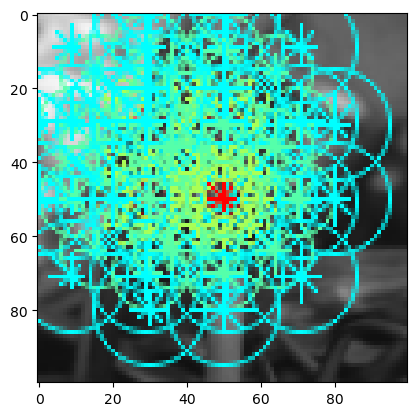

In [13]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

from pylab import *
from skimage.feature import daisy

# lets first visualize what the daisy descriptor looks like
features, img_desc = daisy(im, 
                           step=20, 
                           radius=30, 
                           rings=3, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)
plt.show()

In [14]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=30, 
                 rings=2, histograms=8, orientations=8, 
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

CPU times: user 50.5 ms, sys: 2.63 ms, total: 53.1 ms
Wall time: 18.3 ms


(544,)

In [15]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb

# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: user 1min 25s, sys: 5.59 s, total: 1min 31s
Wall time: 1min 31s
(6552, 544)


In [16]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 2.8 s, sys: 124 ms, total: 2.93 s
Wall time: 457 ms


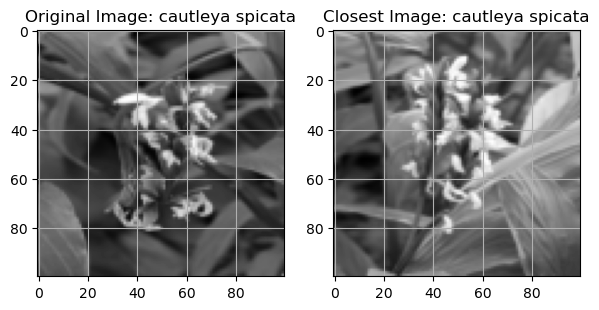

In [17]:
import copy
# find closest image to current image

idx1 = 3
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image: "+val[str(y[idx1])])
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)),cmap='gray')
plt.title("Closest Image: "+val[str(y[idx2])])
plt.grid()



The following feature extraction method works, however given more potential image classifications for the dataset having the particular setup from kaggle shows a large imbalance giving a low accuracy rating. Below we will discuss further into detail.

## Imbalance affect accuracy:
Possible low accuracy reason explaination: Is there any imbalance of the dataset?

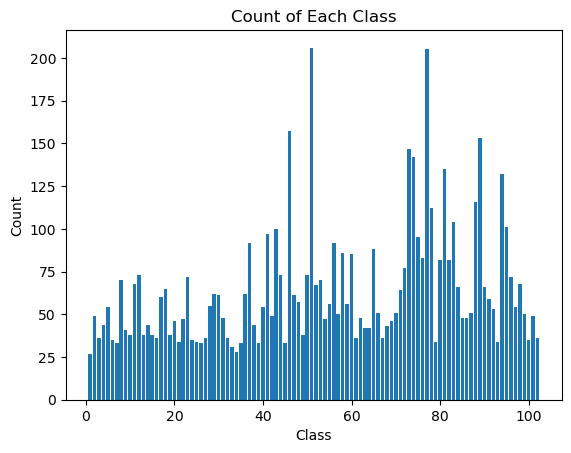

In [18]:
from collections import Counter
count_classes=Counter(y)
plt.bar(list(count_classes.keys()),list(count_classes.values()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.show()

## Heat map of the pairwise differences(Daisy)
Consider the distance between diferent class and consider the distance are close or not by the features

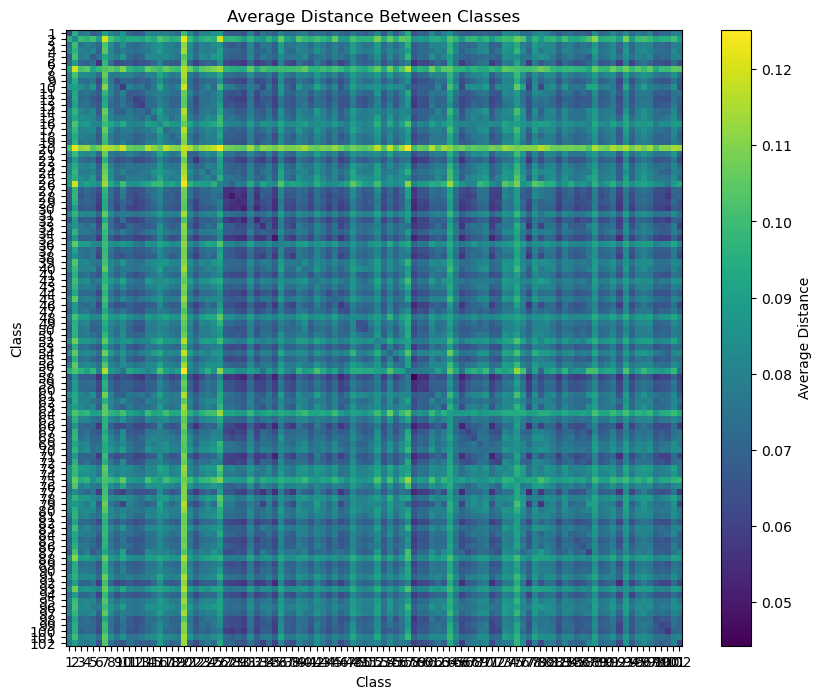

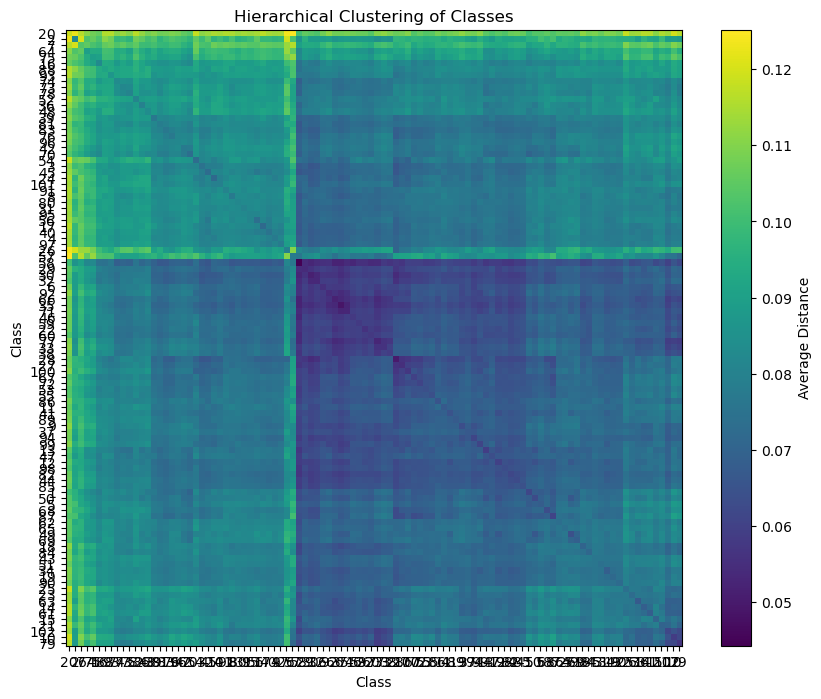

In [19]:
from scipy.cluster import hierarchy

unique_classes = np.unique(y)
num_classes = len(unique_classes)

# Calculate average distance between each pair of classes
avg_distances = np.zeros((num_classes, num_classes))
for i, class1 in enumerate(unique_classes):
    for j, class2 in enumerate(unique_classes):
     
        indices_class1 = np.where(y == class1)[0]
        indices_class2 = np.where(y == class2)[0]
        
        avg_distance = np.mean(dist_matrix[indices_class1][:, indices_class2])
        avg_distances[i, j] = avg_distance

# Create a heatmap of the average distance matrix
plt.figure(figsize=(10, 8))
plt.imshow(avg_distances, cmap='viridis')
plt.colorbar(label='Average Distance')
plt.title('Average Distance Between Classes')
plt.xlabel('Class')
plt.ylabel('Class')
plt.xticks(ticks=np.arange(num_classes), labels=unique_classes)
plt.yticks(ticks=np.arange(num_classes), labels=unique_classes)
plt.show()

# Compute pairwise distances between classes
pairwise_distances = 1 / (1 + avg_distances)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(pairwise_distances, method='complete')

# Reorder the rows and columns based on hierarchical clustering
order = hierarchy.dendrogram(linkage_matrix, no_plot=True)['leaves']
sorted_distances = avg_distances[order][:, order]

# Create a heatmap of the sorted distance matrix
plt.figure(figsize=(10, 8))
plt.imshow(sorted_distances, cmap='viridis')
plt.colorbar(label='Average Distance')
plt.title('Hierarchical Clustering of Classes')
plt.xlabel('Class')
plt.ylabel('Class')
plt.xticks(ticks=np.arange(len(unique_classes)), labels=unique_classes[order])
plt.yticks(ticks=np.arange(len(unique_classes)), labels=unique_classes[order])
plt.show()

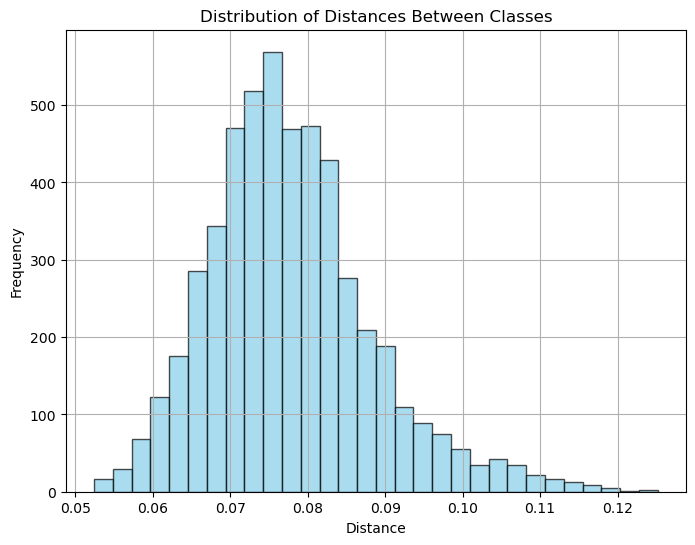

In [20]:
def class_separation_histogram(avg_distances):
    # Flatten the upper triangular part of the distance matrix
    upper_triangular = np.triu(avg_distances, k=1).flatten()
    # Remove zeros (diagonal and lower triangular)
    distances = upper_triangular[upper_triangular > 0]
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Distances Between Classes')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Visualize the distribution of distances between classes
class_separation_histogram(avg_distances)

Based on the heatmap, we can know some are more close than other.

From this images above, we can know the reason why the accuracy of the predicted method will be low.In datasets with a large number of classes, class imbalance becomes more pronounced. Some classes may have significantly fewer samples than others, making it challenging for PCA to effectively capture the variability within each class. This imbalance can lead to biased representations in the lower-dimensional subspace and affect the model's ability to generalize to underrepresented classes. We will use the balance method to prepare data.

## Balance and predict

In [21]:
#run for 4 mins
# pip install -U imbalanced-learn
# conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE # for balance the data

smote=SMOTE(random_state=42)
x_balance,y_balance=smote.fit_resample(X, y)

#PCA
pca_obj = PCA(n_components=300, svd_solver='randomized')
X_pca_features_balanced = pca_obj.fit_transform(x_balance)
X_pca_features_origin=pca_obj.fit_transform(X)
# because of the imbalance the accuracy about 8%


#Daysi 
daisy_features_balanced=np.apply_along_axis(apply_daisy, 1, x_balance, (h,w))

print(X_pca_features_balanced.shape,X_pca_features_origin.shape,daisy_features.shape,daisy_features_balanced.shape) #increase the features to balance

(21012, 300) (6552, 300) (6552, 544) (21012, 544)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# init a classifier for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

# separate the data into train/test
#balanced
pca_train, pca_test, y_train, y_test =train_test_split(X_pca_features_balanced,y_balance, test_size=0.2, train_size=0.8)
#imbalance
pca_train_im,pca_test_im,y_train_im,y_test_im=train_test_split(X_pca_features_origin,y,test_size=0.2,train_size=0.8)

dsy_train, dsy_test, y_train2, y_test2 = train_test_split(daisy_features, y, test_size=0.2, train_size=0.8)
dsy_train_ba,dsy_test_ba,y_train_ba2,y_test_ba2=train_test_split(daisy_features_balanced,y_balance, test_size=0.2, train_size=0.8)



# fit each classifier
knn_pca.fit(pca_train_im,y_train_im)
acc_pca_im=accuracy_score(knn_pca.predict(pca_test_im),y_test_im)

knn_pca.fit(pca_train,y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test),y_test)


knn_dsy.fit(dsy_train,y_train2)
acc_dsy = accuracy_score(knn_dsy.predict(dsy_test),y_test2)

knn_dsy.fit(dsy_train_ba,y_train_ba2)
acc_dsy_ba=accuracy_score(knn_dsy.predict(dsy_test_ba),y_test_ba2)

# report accuracy
table_data = [
    ["PCA (Imbalanced)", f"{100*acc_pca_im:.2f}%"],
    ["PCA (Balanced)", f"{100*acc_pca:.2f}%"],
    ["Daisy(Imbalanced)", f"{100*acc_dsy:.2f}%"],
    ["Daisy(Balanced)",f"{100*acc_dsy_ba:.2f}%"]
]
# Print the table
print(tabulate(table_data, headers=["Method", "Accuracy"]))

Method             Accuracy
-----------------  ----------
PCA (Imbalanced)   8.01%
PCA (Balanced)     90.70%
Daisy(Imbalanced)  18.31%
Daisy(Balanced)    88.89%


Based on the above images and the codes. We use heat map to monitor the dataset discrete status and nearest neighbor classifier to get the actual classifcation, We use the balanced method for the samples and improve the accuracy.

# Exceptional Work

Now rather than using matching on the images with the total DAISY vector, we will instead use key point matching as demonstrated below.

In [23]:
# Code referenced from https://github.com/eclarson/MachineLearningNotebooks/tree/master
# 04. Dimension Reduction and Images.ipynb
# for the exceptional credit, you might be interested in the following code
# you will need to repeat this for all pairs of images in the testing and training 
from skimage.feature import match_descriptors, plot_matches
from skimage.feature import SIFT


def apply_daisy_kepo(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape # PxQxR
    #P = ceil((Height - radius*2) / step) 
    #Q = ceil((Width - radius*2) / step) 
    #R = (rings * histograms + 1) * orientations
    return feat.reshape((s[0]*s[1],s[2]))

d1 = apply_daisy_kepo(X[902],(h,w))
d2 = apply_daisy_kepo(X[900],(h,w))
d3 = apply_daisy_kepo(X[0],(h,w))

print(d1.shape, d2.shape, d3.shape)
print('Classes:',y[902],y[900],y[0])

# return list of the key points indices that matched closely enough
matches1 = match_descriptors(d1, d2, cross_check=True, max_ratio=0.8)
print(f"Number of matches, same class: {matches1.shape[0]}, Percentage:{100*matches1.shape[0]/len(d1):0.2f}%")

# return list of the key points indices that matched closely enough
matches2 = match_descriptors(d1, d3, cross_check=True, max_ratio=0.8)
print(f"Number of matches, diff classes: {matches2.shape[0]}, Percentage:{100*matches2.shape[0]/len(d1):0.2f}%")

(324, 68) (324, 68) (324, 68)
Classes: 51 51 61
Number of matches, same class: 11, Percentage:3.40%
Number of matches, diff classes: 5, Percentage:1.54%


In [24]:
%%time 
daisy_features_kp = np.apply_along_axis(apply_daisy_kepo, 1, X, (h, w))
print('daisy_features with keypoint',daisy_features_kp.shape)
print('origin daisy_features',daisy_features.shape)

daisy_features with keypoint (6552, 324, 68)
origin daisy_features (6552, 544)
CPU times: user 16.8 s, sys: 5.73 s, total: 22.5 s
Wall time: 22.6 s


In [25]:
%%time
from matplotlib.pyplot import imshow

def find_matches(idx):
    match_list_per_idx = []
    for i in range(len(daisy_features_kp)):
        if i == idx:
            match_list_per_idx.append(0)# Dont pick the same image!
        else:
            matches = match_descriptors(daisy_features_kp[idx], daisy_features_kp[i],
                                        cross_check=True, max_ratio=0.8)
            result = matches.shape[0]/len(daisy_features_kp[idx])#make it percentage
            match_list_per_idx.append(result)
            
    return match_list_per_idx

CPU times: user 8 µs, sys: 80 µs, total: 88 µs
Wall time: 482 µs


CPU times: user 30.6 s, sys: 1.08 s, total: 31.7 s
Wall time: 32.2 s


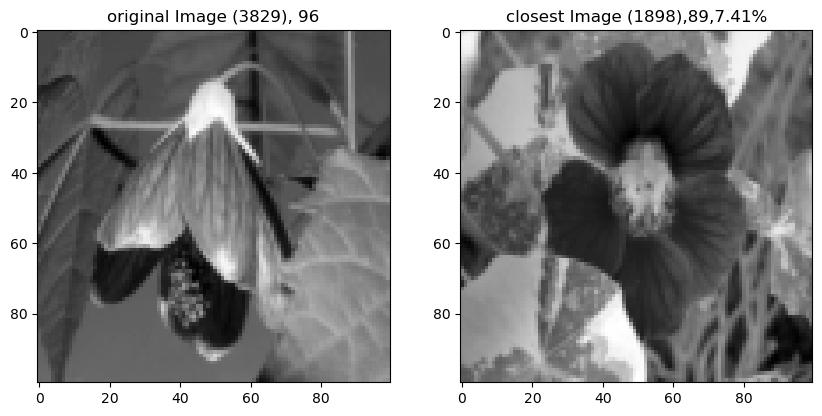

In [26]:
%%time
# Randomly find some image
random_size = 2
for i in range(random_size):
    x = np.random.randint(len(X))
    plt.figure(figsize=(10,50))
    temp = find_matches(x)
    best_match = np.argmax(temp)

    plt.subplot(random_size,2,2*i + 1)
    plt.imshow(X[x].reshape(h,w), cmap=plt.cm.gray)
    plt.title(f"original Image ({x}), {y[x]}")
    plt.grid(False)

    plt.subplot(random_size,2,2*i + 2)
    plt.imshow(X[best_match].reshape(h,w), cmap=plt.cm.gray)
    plt.title(f"closest Image ({best_match}),{y[best_match]},{100*max(temp):.2f}%")
    plt.grid(False)

Same situation as the privious conclusiong, imbalance and a large number of classes. The closest image may not be the same class. But it still focuses on the points of the image. Also, it may ignore other elements in the image which can hard to identify the target.

## Check the Accuarcy

In [27]:
%%time
# this will spend large of time about 20min
import random
test_index=random.sample(range(0,int(len(X)/2)),50)
test_index_2 = random.sample(range(int(len(X)/2),len(X)),50)
test_index.extend(test_index_2)

class_correct = 0
class_error = []
class_error_match = []
for i_index in test_index:
    temp = find_matches(i_index)
    best_match = np.argmax(temp)
    if y[best_match] == y[i_index]:
        class_correct += 1
    else:
        class_error.append(i_index)
        class_error_match.append(best_match)
    
print("accuracy: ",class_correct/(len(test_index)))

accuracy:  0.27
CPU times: user 25min 3s, sys: 36.8 s, total: 25min 40s
Wall time: 25min 55s


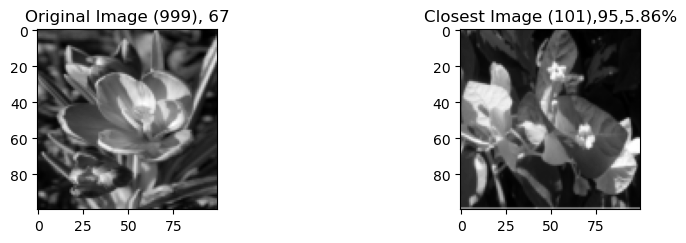

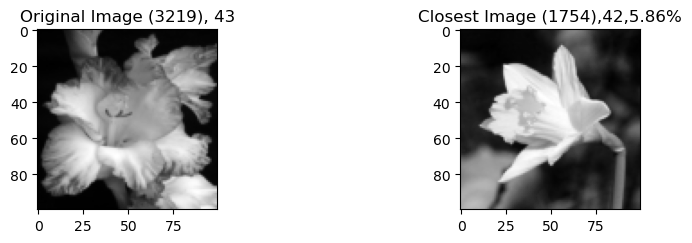

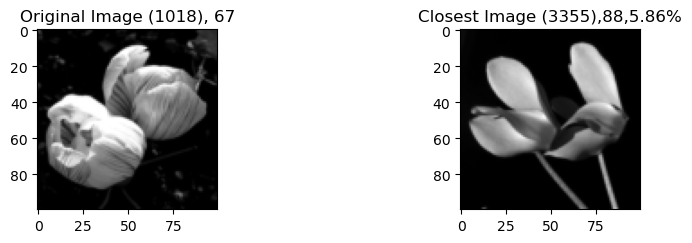

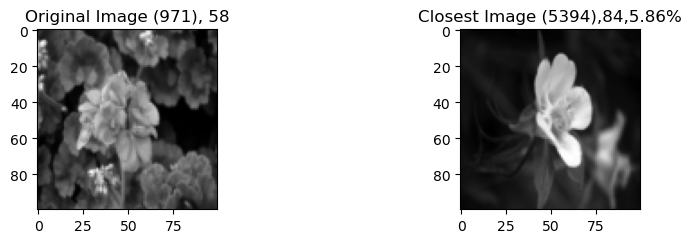

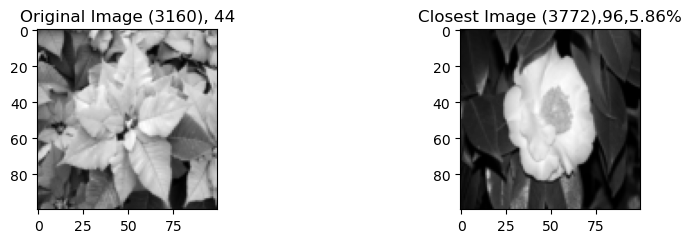

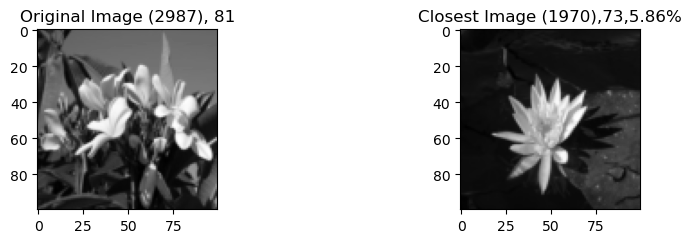

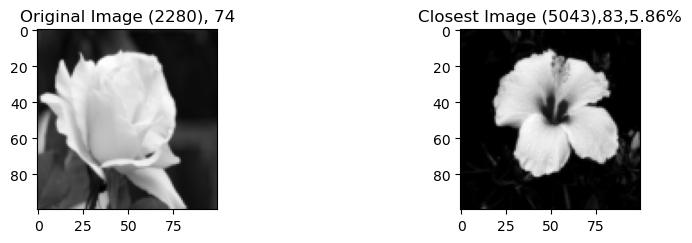

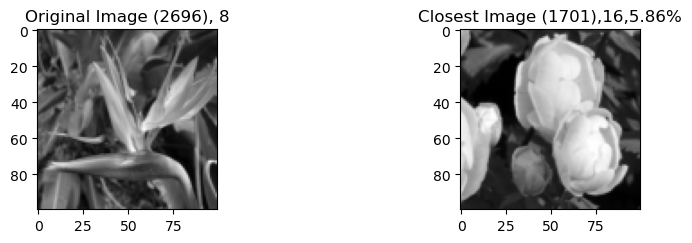

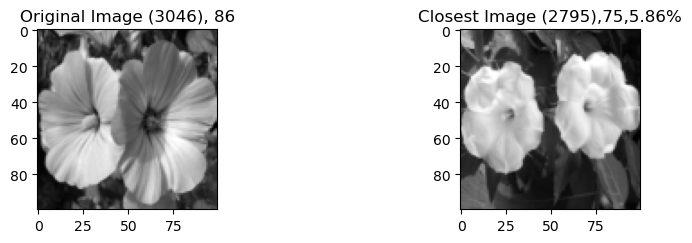

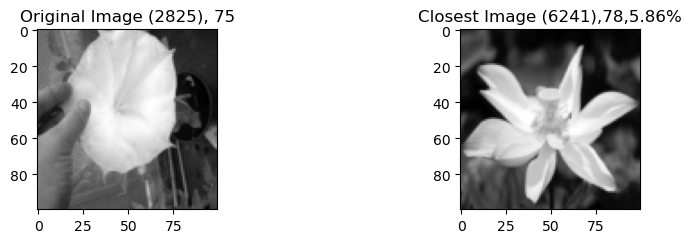

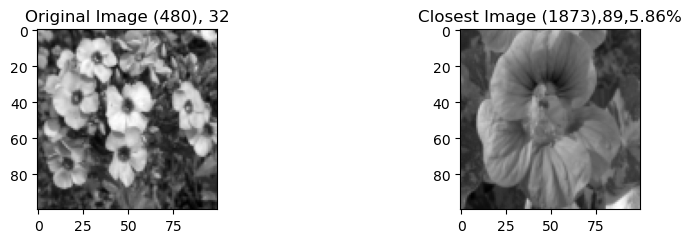

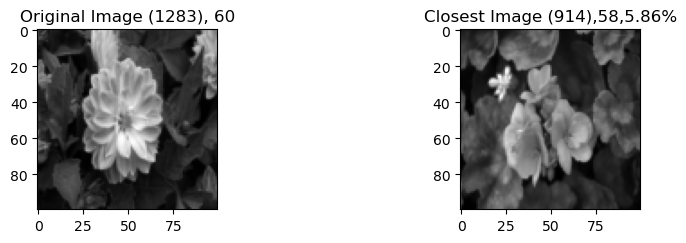

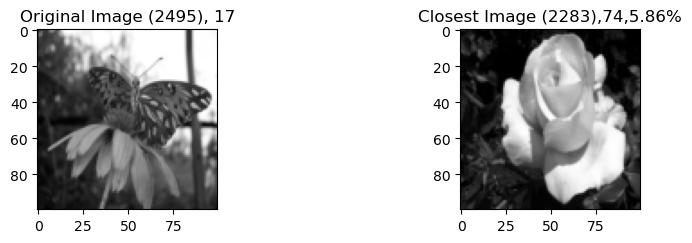

In [28]:
# Give out the incorrect classify sample
plot_num = int(len(class_error)/4) # show part of the images
for i in range(plot_num):
    plt.figure(figsize=(10,50))
    x = class_error[i]
    best_match = class_error_match[i]

    plt.subplot(plot_num,2,2*i + 1)
    plt.imshow(X[x].reshape(h,w), cmap=plt.cm.gray)
    plt.title(f"Original Image ({x}), {y[x]}")
    

    plt.subplot(plot_num,2,2*i + 2)
    plt.imshow(X[best_match].reshape(h,w), cmap=plt.cm.gray)
    plt.title(f"Closest Image ({best_match}),{y[best_match]},{100*max(temp):.2f}%")
    

Based on the result we have, using key point matching is preferable over not using it, especially when dealing with accuracy in imbalanced datasets.

Because of the large number of the classes, this method without dealing with imbalanced will result to the low accuracy. We could take more steps to improve by balance method, by better classifcation algorithm.

# References
Data Source: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset

SIFT feature detector and descriptor extractor: https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_sift.html

In Class Code References: https://github.com/eclarson/MachineLearningNotebooks/tree/master

Fundamental matrix estimation: https://scikit-image.org/docs/stable/auto_examples/transform/plot_fundamental_matrix.html#sphx-glr-auto-examples-transform-plot-fundamental-matrix-py